In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stage-d-project-analysis-using-planet-dataset.ipynb to stage-d-project-analysis-using-planet-dataset.ipynb


In [ ]:
df = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [ ]:
df["FullDate"] = pd.to_datetime(df["FullDate"])
df["FullDate"]

0       2010-09-01 00:00:00
1       2010-09-01 01:00:00
2       2010-09-01 02:00:00
3       2010-09-01 03:00:00
4       2010-09-01 04:00:00
                ...        
92011   2021-02-28 19:00:00
92012   2021-02-28 20:00:00
92013   2021-02-28 21:00:00
92014   2021-02-28 22:00:00
92015   2021-02-28 23:00:00
Name: FullDate, Length: 92016, dtype: datetime64[ns]

In [ ]:
df = df[(df.ElecPrice > df.ElecPrice.quantile(.05)) & (df.ElecPrice < df.ElecPrice.quantile(.95))]

In [ ]:
df.isnull().values.any()

False

In [ ]:
df_daily = df.resample('D', on='FullDate').sum()
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,363.4,39557.79000,84.8700,608.705
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,384.3,38068.81500,93.4500,493.875
2010-09-04,274.0,30940.03500,67.8000,464.490
2010-09-05,298.0,31132.12000,89.0000,479.035
...,...,...,...,...
2021-02-24,470.4,1074.56865,117.6000,620.765
2021-02-25,367.2,9782.42645,92.4409,874.290
2021-02-26,501.6,9030.96035,119.3324,1285.200


Text(0, 0.5, 'ElecPrice')

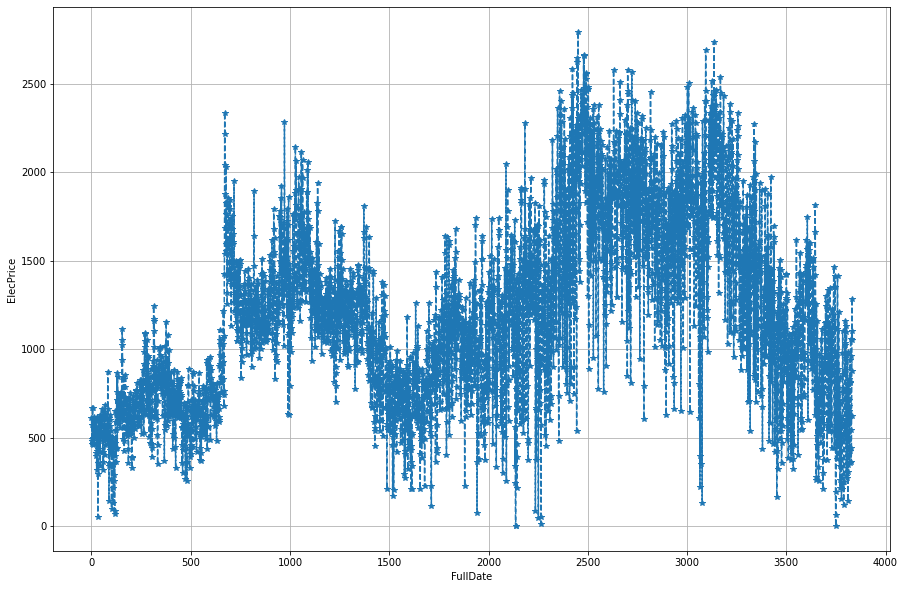

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily[ 'SysLoad' ])
print( f'ADF Statistic: {adf_result[ 1 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )

ADF Statistic: 0.004007721582509669 
p-value: 0.004007721582509669 


In [ ]:
adf_result = adfuller(df_daily[ 'GasPrice' ])
print( f'ADF Statistic: {adf_result[ 2 ]} ' )
print( f'p-value: {adf_result[ 2 ]} ' )

ADF Statistic: 21 
p-value: 21 


In [ ]:
df_daily = df_daily.reset_index()
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,363.4,39557.790,84.87,608.705
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,384.3,38068.815,93.45,493.875
3,2010-09-04,274.0,30940.035,67.80,464.490
4,2010-09-05,298.0,31132.120,89.00,479.035


In [ ]:
df_2 = df_daily[['FullDate', 'ElecPrice']].copy()
df_2.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)

In [ ]:
train = df_2[:2757]
test = df_2[2757:]

In [ ]:
train

,ds,y
0,2010-09-01,608.705
1,2010-09-02,570.810
2,2010-09-03,493.875
3,2010-09-04,464.490
4,2010-09-05,479.035
...,...,...
2752,2018-03-15,2279.775
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1353.370


In [ ]:
from prophet import Prophet

In [ ]:
 model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq99zrtuu/796c6n77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq99zrtuu/pc8tplub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98131', 'data', 'file=/tmp/tmpq99zrtuu/796c6n77.json', 'init=/tmp/tmpq99zrtuu/pc8tplub.json', 'output', 'file=/tmp/tmpq99zrtuu/prophet_modeli7z8o2su/prophet_model-20230130220600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


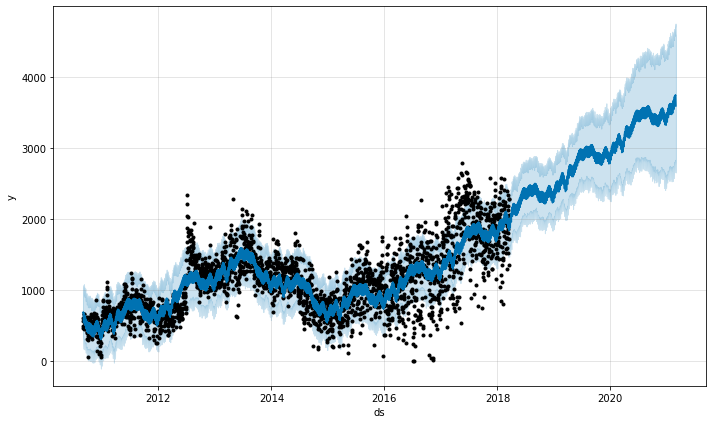

In [ ]:
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper' ]].tail()
model.plot(forecast)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
y_true = test['y'].values
y_true

array([1833.  , 1730.49, 1936.5 , ..., 1285.2 , 1049.56, 1102.13])

In [ ]:
y_pred = forecast[2757:]['yhat'].values
y_pred

array([1989.6513039 , 1984.87933805, 1991.97705967, ..., 3747.91129895,
       3658.09879218, 3594.46592076])

In [ ]:
mae = mean_absolute_error(y_true, y_pred)
mae

1528.8464139213852

In [ ]:
mse =np.sqrt(mean_squared_error(y_true, y_pred))
mse

1780.1338902736306

In [ ]:
mape = mean_absolute_percentage_error(y_true, y_pred)
mape

1.4256023416487828e+16

In [ ]:
df_3 = df_daily[['FullDate', 'SysLoad', 'Tmax', 'GasPrice', 'ElecPrice']].copy()
df_3.rename(columns={'FullDate': 'ds', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3', 'ElecPrice': 'y'}, inplace=True)

In [ ]:
train_2 = df_3[:2757]
test_2 = df_3[2757:]

In [ ]:
train_2

,ds,add1,add2,add3,y
0,2010-09-01,39557.79000,363.4,84.8700,608.705
1,2010-09-02,38898.99000,369.6,88.5600,570.810
2,2010-09-03,38068.81500,384.3,93.4500,493.875
3,2010-09-04,30940.03500,274.0,67.8000,464.490
4,2010-09-05,31132.12000,298.0,89.0000,479.035
...,...,...,...,...,...
2752,2018-03-15,23112.53405,533.4,193.0488,2279.775
2753,2018-03-16,19710.46400,648.0,216.9600,2277.335
2754,2018-03-17,1079.34705,724.8,209.0400,1718.385
2755,2018-03-18,-2200.59835,424.0,169.9900,1353.370


In [ ]:
test_2

,ds,add1,add2,add3,y
2757,2018-03-20,7696.91130,540.0,201.5880,1833.000
2758,2018-03-21,4658.05865,571.2,203.2560,1730.490
2759,2018-03-22,17386.36300,662.2,186.3180,1936.500
2760,2018-03-23,18090.43435,811.2,198.6456,2138.760
2761,2018-03-24,3763.53865,832.8,180.2160,1721.700
...,...,...,...,...,...
3829,2021-02-24,1074.56865,470.4,117.6000,620.765
3830,2021-02-25,9782.42645,367.2,92.4409,874.290
3831,2021-02-26,9030.96035,501.6,119.3324,1285.200
3832,2021-02-27,8170.69030,376.0,86.7200,1049.560


In [ ]:
 model = Prophet()
model.fit(train_2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq99zrtuu/hg9ty4mj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq99zrtuu/z_sxsutm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16305', 'data', 'file=/tmp/tmpq99zrtuu/hg9ty4mj.json', 'init=/tmp/tmpq99zrtuu/z_sxsutm.json', 'output', 'file=/tmp/tmpq99zrtuu/prophet_model840hfiv1/prophet_model-20230130220607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


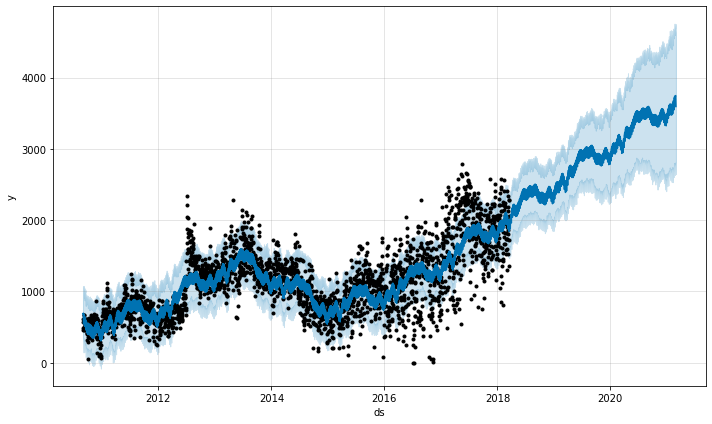

In [ ]:
future = model.make_future_dataframe(periods=len(test_2))
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper' ]].tail()
model.plot(forecast)
plt.show()

In [ ]:
y_truee = test_2['y'].values
y_truee

array([1833.  , 1730.49, 1936.5 , ..., 1285.2 , 1049.56, 1102.13])

In [ ]:
y_predd = forecast[2757:]['yhat'].values
y_predd

array([1989.6513039 , 1984.87933805, 1991.97705967, ..., 3747.91129895,
       3658.09879218, 3594.46592076])

In [ ]:
mae = mean_absolute_error(y_truee, y_predd)
mae

1528.8464139213852